# Neural Network Regression With TensorFlow
There are many difinitions for a regressin problem but in our case, we're going to simplify it: predicting a numerical variable based on some combination of variables, even shorter... predictions a number.

### Where can you get help?

- follow along with the code
- try it for yourself
- press shift + cmd + space to read the docstring
- search for it
- try again
- ask (don't forget the discord char)

### What is a regression problem?

In statistical modeling, **regression analysis** is a set of statistical processes for estimating the relationship between a dependent variable (often called the _outcome variable_) and one more independent variables (often called _predictors_, _covariates_ or \_features).

- **how much** will this house sell for?
- **how many** people will buy this app?
- **how much** will my health insurance be?
- **how much** should I save each week for fuel?
- **predict** coordinates of where the boxes should be in an **object detection**

### What we're going to cover

- Architecture of a neural network regression model
- input shapes and output shapes of a regression model (features and labels)
- creating custom data to view and fit
- steps in modelling: create, compiling fitting and evaluating a model
- different evalutation methods
- saving and loading models

## Architecture Model

| HyperParamter           | Typical value                                                                                    |
| ----------------------- | ------------------------------------------------------------------------------------------------ |
| input layer shape       | same shape as number of features                                                                 |
| hidden layer            | problem specific, minimum = 1, maximum = unlimited                                               |
| neuron per hidden layer | problem specific, generally 10 to 100                                                            |
| output layer shape      | same shape as desired prediction shape                                                           |
| hidden activation       | usually relu (rectified linear unit)                                                             |
| output activation       | None, ReLu, Logisctic/tanh                                                                       |
| loss function           | MSE (mean square error) or MAE (mean absolute error) / Huber (combination of MAE/MSE) if outiler |
| optimizer               | SGD (stochastic gradient descent), Adam                                                          |


In [2]:
# import dependecies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import path


from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [4]:
MODEL_PATH = path.join('..', 'storage', 'models')
MODEL_DATASETS = path.join('..', 'storage', 'datasets')

In [ ]:
# create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0], dtype=np.float32)

# crate labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0], dtype=np.float32)

# visualize
plt.figure(figsize=(12, 6))
ax = plt.scatter(x, y)

In [ ]:
y.dtype, x.dtype

In [ ]:
x = tf.constant(x)
y = tf.constant(y)

x, y

In [ ]:
y == x + 10

In [ ]:
tf.constant([1,2,3], shape=(3,))

### Input shapes and output shapes

In [ ]:
# crate a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

In [ ]:
input_shape = x.shape
output_shape = y.shape

input_shape, output_shape

### Steps in modelling with TensorFlow

1. Create a model - define the input and output lyaers,as well the hidden layer of a deep learning model
2. compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluating metrics (what wwe can use to interpret the performance of our model).
3. fitting a model - letting the model try to find patterns between x & y feature and labels

- **Loss** - how wrong your model's predictions are compared to the truth labels _you want to minimise this_
- **Optimizer** - how you model should update its internal patterns to better its predictions.
- **Metrics** - human interpretable values for how well your model is doing.
- **Epochs** - how many times the model will go through all of the training examples.
- **Evaluate** - how reliable are our model's predictions.


In [ ]:
# set random seed
tf.random.set_seed(42)

# create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(
    loss=tf.keras.losses.mae,  # Mean Square error
    optimizer=tf.keras.optimizers.SGD(),  # Stochastic Gradient Descent
    metrics=['mae']
)


Mean Square Error


$$\mathrm {MAE} ={\frac {\sum _{i=1}^{n}\left|y_{i}-x_{i}\right|}{n}}={\frac {\sum _{i=1}^{n}\left|e_{i}\right|}{n}}$$

It is thus as arithmetic average of the absolute errors $|e_{i}| = |y_{i} - x_{i}|$ where $y_{i}$ is prediction and $x_{i}$ the true value.

Stochastic Gradient Descent

$$Q(W)={\frac {1}{n}}\sum _{i=1}^{n}Q_{i}(w)$$

In [ ]:
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

In [ ]:
# check out x and y
x, y

In [ ]:
# try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

In [ ]:
y_pred + 11

### Improving our model

we can improve our model, by altering the steps we took to create a model.

1. **creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).


In [ ]:
# create a model 
model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(1))

# compile
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

In [ ]:
model.fit(tf.expand_dims(x, axis=-1), y, epochs=10)

In [ ]:
x, y

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

### Evalutin a model

In practice, a typical workflow you'll go through when building neural network is:

when it comes to evaluation... there are3 words you should memrize:

> "visualize, visualize, visualize"

It's a good idea to visualize:
- the data - what data are we working with? what does it look like?
- the model itself - what does our model look like?
- the training of a model - how does a model perform while it learn?
- the predictions of the model - how do the predictions of model line up against the down

In [2]:
# make a bigger dataset
x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [3]:
# make labels for te dataset
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [ ]:
plt.figure(figsize=(12, 6))
ax = plt.scatter(x, y)

### The 3 sets..

- **Training set** - the model learns from this data, which is typically 70-80% of the total data you have availalbe.
- **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
- **Test set** - the model gets evaluated on this data to set what is has learned, this set is typically 10-15% of the total data.

In [ ]:
### The 3 sets... check the length of how many samples we have
len(x)

In [4]:
x_train = x[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

x_test = x[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualize data

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(x_train, y_train, c='b', label='Training data')
plt.scatter(x_test, y_test, c='g', label='Test data')
plt.legend()
plt.show()


In [ ]:
# let's have a look at how to build a neural network for our data
# create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])
# model.fit(x_train, y_train, epochs=100)

In [ ]:
model.summary()

In [18]:
# let's create a model which builds automatically by defining the input_shape arguments
# set seed to random for always return the same values
tf.random.set_seed(42)

# 1. create a model
model = tf.keras.Sequential(name="""ml_sample""")
model.add(tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'))
model.add(tf.keras.layers.Dense(1, name='output_layer'))

# 2. compile the model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

In [19]:
# visualize model's info
model.summary()

Model: "ml_sample"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


- Total params - total number of parameters in the model
- Trainable parameters - these are parameters (patterns) the model can update as it trains
- Non-trainable params - these paramters aren't updated during training this is typical when you have parameters from other models during transfer learning

> **Note**: for a more in-depth overview of the trainable paramters within a layer, check out MIT's introcution to deep learning video.

In [20]:
model.fit(x_train, y_train, epochs=100, verbose=0)

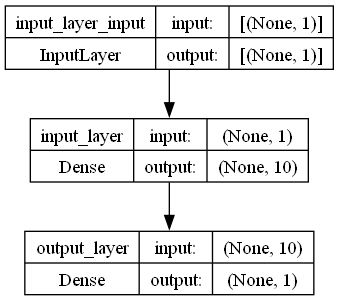

In [21]:
plot_model(model, show_shapes=True)

### Visualize our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels. Often you'll see this in the form of **y_test** or **y_true** versus **y_pred** (ground truth your model's predictions)

In [23]:
# make some predictions
y_pred = model.predict(x_test)
y_pred, y_test

1/1 [==============================] - 0s 53ms/step


(array([[ 81.61715 ],
        [ 86.94328 ],
        [ 92.269424],
        [ 97.595566],
        [102.9217  ],
        [108.24785 ],
        [113.574   ],
        [118.90014 ],
        [124.22629 ],
        [129.55241 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [25]:
# let's create a plotting functions
def plot_prediction(train_data=x_train,
                    train_labels=y_train,
                    test_data=x_test,
                    test_labels=y_test,
                    predictions=y_pred):
    """Plots training data, test data and compares predictions to ground truth labels"""
    plt.figure(figsize=(16, 6))

    # plot training data in line
    plt.scatter(train_data, train_labels, c='b', label='Training data')

    # plot testing data in green
    plt.scatter(test_data, test_labels, c='g', label='Testing data')

    # plot model's predictions in red
    plt.scatter(test_data, predictions, c='r', label='Predictions')

    # show legend
    plt.legend()

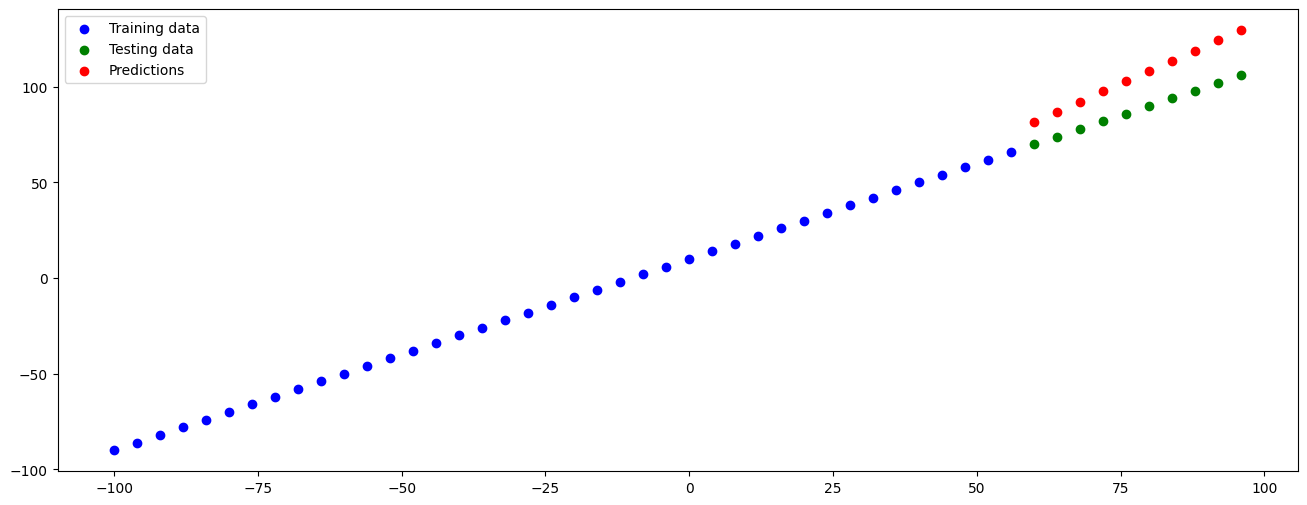

In [26]:
plot_prediction()

### Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evalute your model's performance.

since we're working on a regression, two of the main metrics:

- MAE - mean absolute error: $\displaystyle \mathrm {MAE} = {\frac {\sum _{i=1}^{n}\left|y_{i}-x_{i}\right|}{n}}$  
  When to use: As a great starter metrics for any regression problem

- MSE - mean square error: $\displaystyle \mathrm {MSE} = {\frac {1}{n}}\sum _{i=1}^{n}\left(Y_{i}-{\hat {Y_{i}}}\right)^{2}$  
  When to use: when larger errors are more significant than smaller error

- Huber -
  $\displaystyle L_{\delta }(y,f(x))={\begin{cases}{\frac {1}{2}}(y-f(x))^{2}&{\text{for }}|y-f(x)|\leq \delta ,\\\delta \ \cdot \left(|y-f(x)|-{\frac {1}{2}}\delta \right),&{\text{otherwise.}}\end{cases}}$  
  When to use: Combination of MSE and MAE. Less sensitive to outlier than MSE


In [27]:
# Evaluate the model on the test
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 250ms/step - loss: 17.5848 - mae: 17.5848


[17.584781646728516, 17.584781646728516]

In [31]:
# Calculate the mean absolute error
tf.keras.losses.MAE(y_test, y_pred).numpy(), tf.metrics.mean_absolute_error(y_test, y_pred).numpy()

(array([10.95314 , 10.      , 10.453885, 12.238226, 15.537359, 20.247849,
        25.573997, 30.90014 , 36.226288, 41.552414], dtype=float32),
 array([10.95314 , 10.      , 10.453885, 12.238226, 15.537359, 20.247849,
        25.573997, 30.90014 , 36.226288, 41.552414], dtype=float32))

In [32]:
y_pred, y_test

(array([[ 81.61715 ],
        [ 86.94328 ],
        [ 92.269424],
        [ 97.595566],
        [102.9217  ],
        [108.24785 ],
        [113.574   ],
        [118.90014 ],
        [124.22629 ],
        [129.55241 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [35]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae.numpy()

17.584782

In [36]:
# calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse.numpy()

323.7334

In [37]:
huber = tf.keras.losses.huber(y_true=y_test, y_pred=tf.squeeze(y_pred))
huber.numpy()

17.084782

In [49]:
# make some functins to reuse MAE, Huber and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true, y_pred)


def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true, y_pred)


def huber(y_true, y_pred):
    return tf.keras.losses.huber(y_true, y_pred)

def print_eval(mae, mse, huber):
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'Huber: {huber}')

### Running experiments to improve our model

```
build a model > fit it > evaluate it > tweak it > fit it > evaluate it > tweat it > fit it > evaluate it....
```

1. Get more data - get more examples for your model to train or more oportunities to learn patterns or relationships between features and labels
2. Make your model larger (using a more complex model) - this might come in the form layers or more hidden units in each layer.
3. Train for longer - give your model more of a change to find patterns in the data.

modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.


In [44]:
x_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

**Build model 1**

In [46]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([ tf.keras.layers.Dense(1, input_shape=(1,)) ], name='model_1')
model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])
model_1.fit(x_train, y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 21ms/step


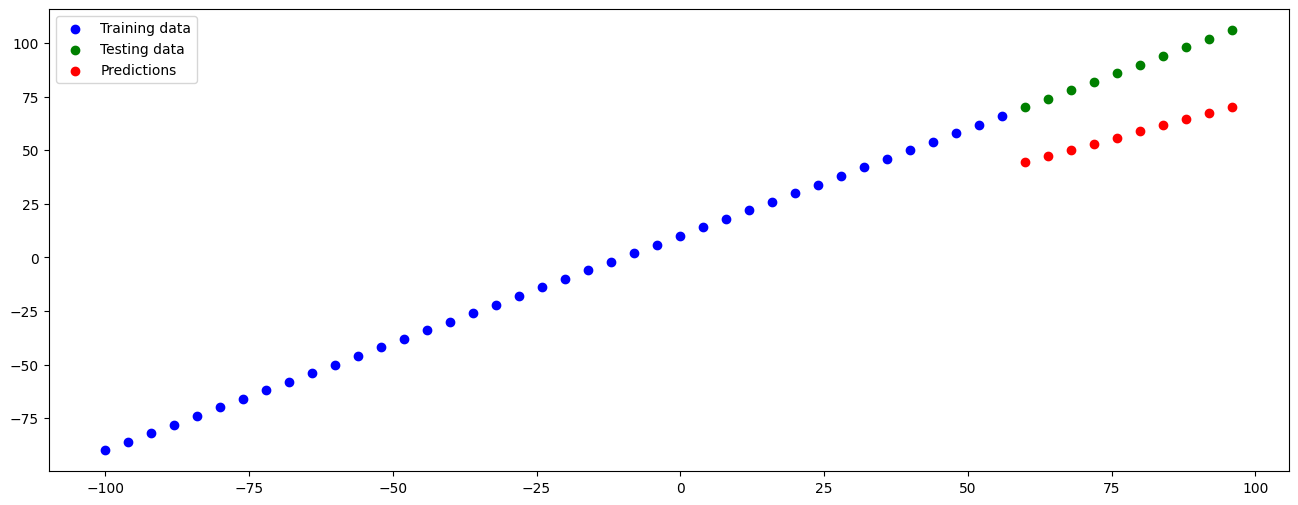

In [48]:
# make and plot predictions for model_1
y_pred_1 = model_1.predict(x_test)
plot_prediction(predictions=y_pred_1)

In [50]:
# calculate model_1 evaluation metrics
mae_1 = mae(y_test, tf.squeeze(y_pred_1))
mse_1 = mse(y_test, tf.squeeze(y_pred_1))
hub_1 = huber(y_test, tf.squeeze(y_pred_1))

print_eval(mae_1, mse_1, hub_1)

MAE: 30.634023666381836
MSE: 948.87255859375
Huber: 30.134023666381836


**Build model 2**

In [54]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),
    tf.keras.layers.Dense(1)], name="model_2")

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])
model_2.fit(x_train, y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 38ms/step


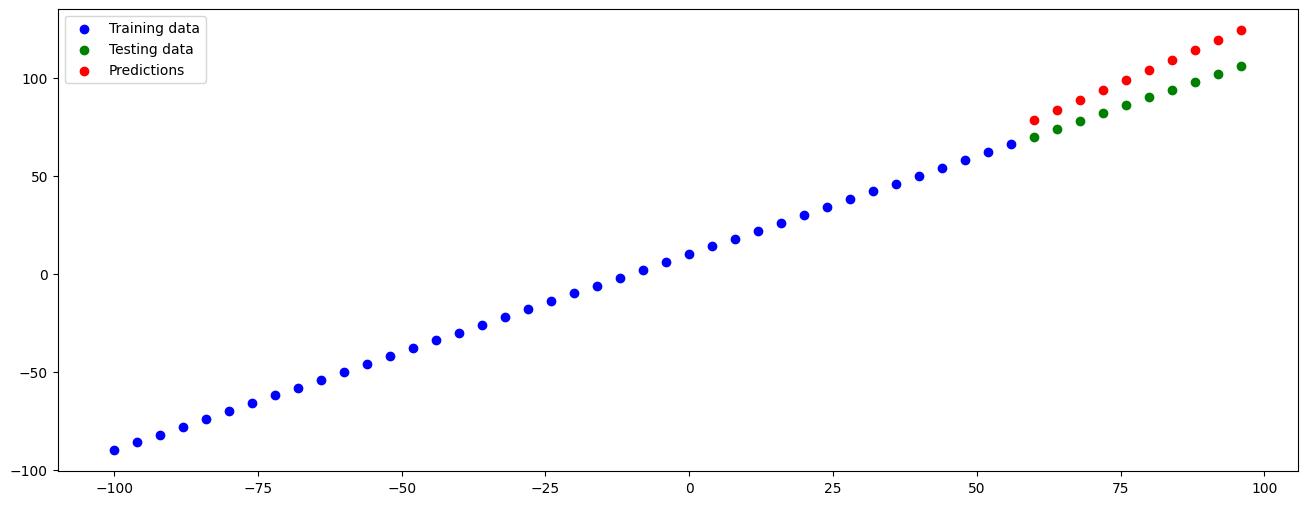

In [57]:
# make and plot predictions for model_2
y_pred_2 = model_2.predict(x_test)
plot_prediction(predictions=y_pred_2)

In [60]:
# calculate model_1 evaluation metrics
mae_2 = mae(y_test, tf.squeeze(y_pred_2))
mse_2 = mse(y_test, tf.squeeze(y_pred_2))
hub_2 = huber(y_test, tf.squeeze(y_pred_2))

print_eval(mae_2, mse_2, hub_2)

MAE: 13.25341510772705
MSE: 185.6611785888672
Huber: 12.753416061401367


**Build model 3**

In [58]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([tf.keras.layers.Dense(
    10, input_shape=(1,)), tf.keras.layers.Dense(1)], name="model_3")
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])
model_3.fit(x_train, y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 62ms/step


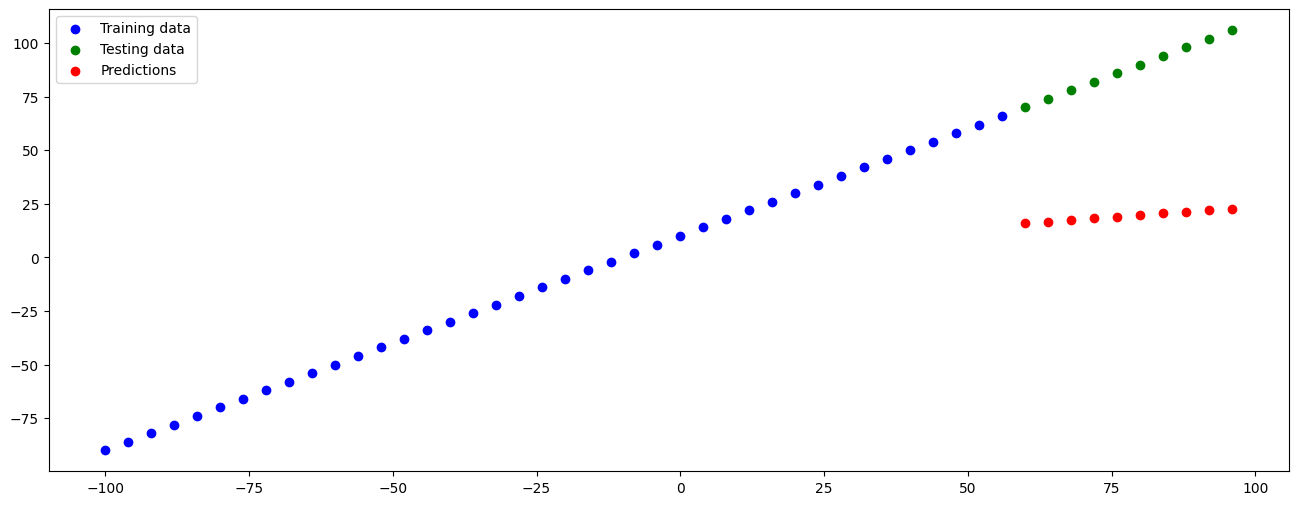

In [59]:
# make and plot predictions for model_2
y_pred_3 = model_3.predict(x_test)
plot_prediction(predictions=y_pred_3)

In [61]:
# calculate model_1 evaluation metrics
mae_3 = mae(y_test, tf.squeeze(y_pred_3))
mse_3 = mse(y_test, tf.squeeze(y_pred_3))
hub_3 = huber(y_test, tf.squeeze(y_pred_3))

print_eval(mae_3, mse_3, hub_3)

MAE: 68.64273834228516
MSE: 4798.28125
Huber: 68.14273834228516


### Camparing the result of our experiments

we've run few experiments let's compare the results

In [64]:
# Let's compare our model's result using a pandas dataframe
model_results = [
    ('model_1', mae_1.numpy(), mse_1.numpy()),
    ('model_2', mae_2.numpy(), mse_2.numpy()),
    ('model_3', mae_3.numpy(), mse_3.numpy())
]

all_results = pd.DataFrame(model_results, columns=('model', 'mae', 'mse'))
all_results

,model,mae,mse
0,model_1,30.634024,948.872559
1,model_2,13.253415,185.661179
2,model_3,68.642738,4798.281250


Looks like `model_2` performed the best...

In [65]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> **Note**: One of your main goals should be to minimze the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remenber the machine learning practioner's motto: "experiment, experiment, experiment"

### Tracking your experiments

One really good habit in machine learning modelling is to track the result of your experiments. And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!  
**Resource:** As you build more models, you'll want to look into using:

- Tensorboard - a component of the tensorflow library to help track modelling experiments (we'll see this on later).
- Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).


### Saving our models

Saving our models allows us to use them ouside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save model's too:

1. The SavedModel format
2. The HDF format


In [68]:
# Save model using the SavedModel formats
model_2.save(f'{MODEL_PATH}/best_model_SavedModel_format')

INFO:tensorflow:Assets written to: ..\storage\models\best_model_SavedModel_format\assets


In [71]:
# Save model using the HDF5 format
model_2.save(f'{MODEL_PATH}/best_model_HDF5_format.h5')

Loading in a saved model

In [72]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model(f'{MODEL_PATH}/best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [73]:
# compare mode_2 predictions with savedmodel format predictions
model_2_pred = model_2.predict(x_test)
load_model_2_pred = loaded_SavedModel_format.predict(x_test)

model_2_pred == load_model_2_pred

1/1 [==============================] - 0s 67ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [75]:
mae(y_true=y_test, y_pred=tf.squeeze(model_2_pred)) == mae(y_true=y_test, y_pred=tf.squeeze(load_model_2_pred))

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [77]:
# Load in a model using the .h5 format
load_h5_model = tf.keras.models.load_model(f'{MODEL_PATH}/best_model_HDF5_format.h5')
load_h5_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [78]:
# compare mode_2 predictions with savedmodel format predictions
model_h5_pred = model_2.predict(x_test)
load_model_h5_pred = load_h5_model.predict(x_test)

model_h5_pred == load_model_h5_pred

1/1 [==============================] - 0s 74ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [79]:
mae(y_true=y_test, y_pred=tf.squeeze(model_h5_pred)) == mae(y_true=y_test, y_pred=tf.squeeze(load_model_h5_pred))

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## A Larger Example

In [5]:
df_insurance = pd.read_csv(f'{MODEL_DATASETS}/insurance.csv')
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Dummies

In [6]:
insurance_one_hot = pd.get_dummies(df_insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [7]:
# create x & y values (features and labels)
x = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [87]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [88]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
# create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x), len(x_train), len(x_test)

(1338, 1070, 268)

In [9]:
# build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# create a model
insurance_model = tf.keras.Sequential([tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
                                       ], name='insurance_model')

# compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

# fit the model
insurance_model.fit(x_train, y_train, epochs=100, verbose=0)

In [10]:
# check the results of the insurance model on the data
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8466.6914 - mae: 8466.6914


[8466.69140625, 8466.69140625]

In [11]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments
1. Add an extra layer with more hidden units
2. Train for longer
3. insert your own experiment here


In [12]:
# build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# create a model
insurance_model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
                                       ], name='insurance_model_2')

# compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

# fit the model
insurance_model_2.fit(x_train, y_train, epochs=100, verbose=0)

In [13]:
# check the results of the insurance model on the data
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 8466.6914 - mae: 8466.6914


[8466.69140625, 8466.69140625]

In [18]:
# build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# create a model
insurance_model_3 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
                                       ], name='insurance_model_3')

# compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

# fit the model
history = insurance_model_3.fit(x_train, y_train, epochs=200, verbose=0)

In [19]:
insurance_model_3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3161.4583 - mae: 3161.4583


[3161.458251953125, 3161.458251953125]

Text(0.5, 0, 'epochs')

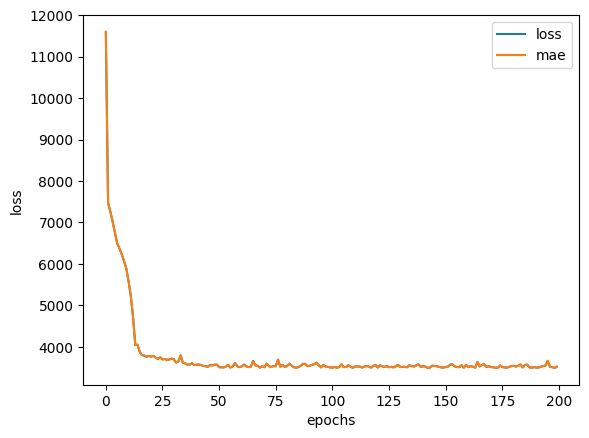

In [20]:
# plot history (also know as a loss curve or a training curve)

pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

> **Note** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people  have asked this question before... so TensorFlow has a solution! it's called the [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to you model.

### Preproccessing data (normalization and standardization)

<AxesSubplot:ylabel='Frequency'>

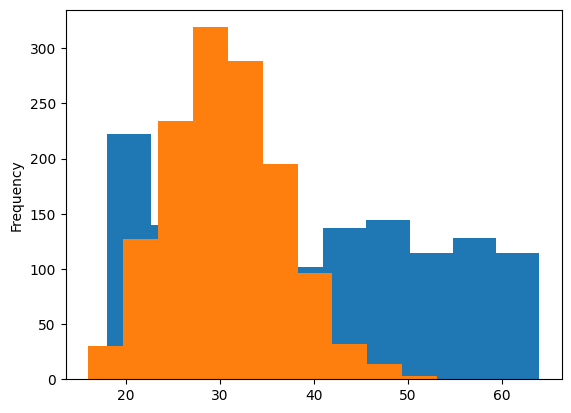

In [22]:
x['age'].plot(kind='hist')
x['bmi'].plot(kind='hist')